C:\Users\mannu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mannu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.7212797181816302
Clustering results saved as 'Mannu_patel_Clustering.pdf'


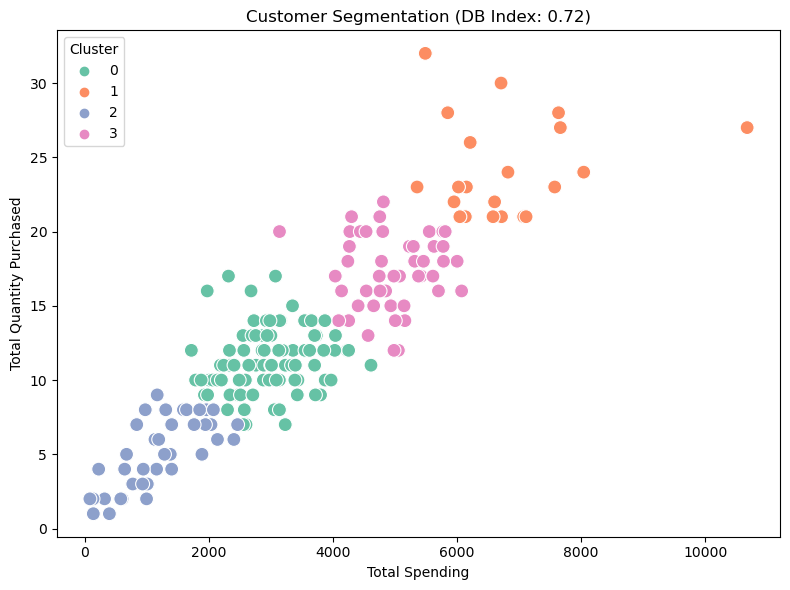

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

import seaborn as sns

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

customer_profile = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
}).reset_index()

customer_profile = customer_profile.merge(customers[['CustomerID', 'Region']], on='CustomerID')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity']])

kmeans = KMeans(n_clusters=4, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_data)

db_index = davies_bouldin_score(scaled_data, customer_profile['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_profile, x='TotalValue', y='Quantity', hue='Cluster', palette='Set2', s=100, marker='o')
plt.title(f'Customer Segmentation (DB Index: {db_index:.2f})')
plt.xlabel('Total Spending')
plt.ylabel('Total Quantity Purchased')
plt.tight_layout()
plt.savefig('clustering_results.png')

from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

pdf_filename = "Mannu_Patel_Clustering.pdf"
c = canvas.Canvas(pdf_filename, pagesize=letter)
width, height = letter


c.setFont("Helvetica-Bold", 16)
c.drawString(100, height - 100, "Customer Segmentation using K-Means Clustering")
c.setFont("Helvetica", 12)
c.drawString(100, height - 130, "By:Mannu Patel")
c.showPage()

c.setFont("Helvetica-Bold", 14)
c.drawString(100, height - 100, "1. Clustering Results")
c.setFont("Helvetica", 12)
c.drawString(100, height - 130, f"Number of clusters: 4")
c.drawString(100, height - 150, f"Davies-Bouldin Index: {db_index:.2f}")

c.drawImage('clustering_results.png', 100, height - 400, width=400, height=300)

c.save()

print("Clustering results saved as 'Mannu_patel_Clustering.pdf'")
